### Statistical Inference Point Estimation

This notebook demostrates the concept of sampling distribution of a statistic. It also shows that
- Sample mean is unbiased
- Sample variance is unbiased
- Analytical solution of sampling variation of mean and variance


Consider a senario: FSU has **20,000** students, their IQ level follows a normal distribution with mean of **110**, and standard deviation of **10**. Let's draw samples from the student population and examine the relationship between sample and population.

## Sample mean

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate population data

(array([4.000e+00, 4.200e+01, 4.050e+02, 2.207e+03, 5.524e+03, 6.716e+03,
        3.918e+03, 1.016e+03, 1.610e+02, 7.000e+00]),
 array([ 63.48456826,  72.35925701,  81.23394575,  90.10863449,
         98.98332324, 107.85801198, 116.73270073, 125.60738947,
        134.48207822, 143.35676696, 152.2314557 ]),
 <BarContainer object of 10 artists>)

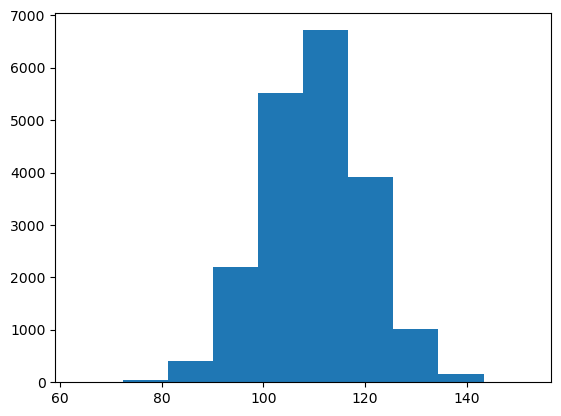

In [2]:
N = 20000 #20,000 students

#Generate from a normal distribution with mean 110 and std 10
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [3]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 110.13323090319263
Population variance is: 100.50979295243435



### Now lets draw samples. Let's start with a sample size of 10 students

In [4]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([119.84128988, 107.47510114, 110.90483282, 131.46678085,
       113.02216538, 113.81015187, 113.11799846,  86.28580631,
       103.93072711, 108.57725374])

In [5]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  110.84321075645553


### How about if we repeat the sampling process, say 1,000 times

In [6]:
#Create an empty list to hold the numbers from each sample
sample_10_mean_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_10_mean_list.append(sample_mean)

0  sample mean:  107.8486008529929
1  sample mean:  107.24022351790464
2  sample mean:  117.15940513560447
3  sample mean:  110.76714927357789
4  sample mean:  106.06746565032901
5  sample mean:  102.79436228655591
6  sample mean:  111.69053948978782
7  sample mean:  105.05760319732721
8  sample mean:  111.20405645894812
9  sample mean:  112.45675349819973
10  sample mean:  105.88842373102314
11  sample mean:  106.84522869418859
12  sample mean:  112.39309614093524
13  sample mean:  111.51210509481879
14  sample mean:  109.2807923835481
15  sample mean:  115.79766356376305
16  sample mean:  112.66785604876165
17  sample mean:  106.09829697728006
18  sample mean:  107.73732021438119
19  sample mean:  106.55700045463554
20  sample mean:  107.16017572777989
21  sample mean:  111.86492646203078
22  sample mean:  109.28001359558834
23  sample mean:  103.06017537626057
24  sample mean:  113.05318459560317
25  sample mean:  110.11459368606009
26  sample mean:  102.70023226022963
27  sample me

We observe a different sample mean every time we take sample. If we look at their distributions, the sampling distribution of the sample mean is:

(array([  1.,  12.,  61., 185., 307., 272., 129.,  31.,   1.,   1.]),
 array([ 97.46204025, 100.07786049, 102.69368072, 105.30950095,
        107.92532119, 110.54114142, 113.15696166, 115.77278189,
        118.38860212, 121.00442236, 123.62024259]),
 <BarContainer object of 10 artists>)

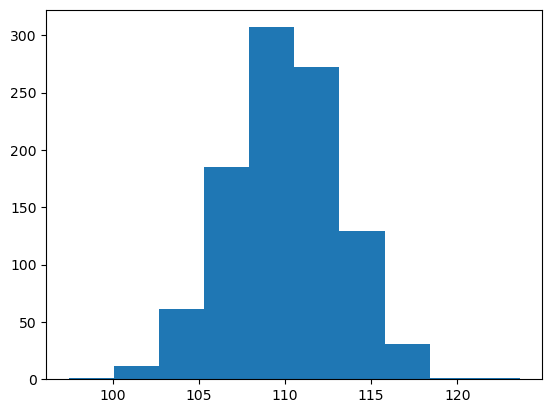

In [7]:
plt.hist(sample_10_mean_list)

**Important note:** This is not the distribution of IQ level! This is the distribution of average IQ level in a given sample (10 students in a sample) over 1,000 times.

The mean of this distribution is:

In [8]:
np.mean(sample_10_mean_list)

109.97833942337813

Let's compare with the population mean which is:

In [9]:
np.mean(data)

110.13323090319263

Fairly close!

Will it be closer for the sample mean to approach to the true mean if we 1) increase the sample size (10->100); and 2) do more samplings (10,000 -> 1,000,000). YES!

In [10]:
#Create an empty list to hold the numbers from each sample
sample_100_mean_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    #print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_100_mean_list.append(sample_mean)

(array([9.90000e+01, 2.28300e+03, 2.49520e+04, 1.27164e+05, 2.98985e+05,
        3.29743e+05, 1.71132e+05, 4.09120e+04, 4.49700e+03, 2.33000e+02]),
 array([105.49590848, 106.39963986, 107.30337124, 108.20710262,
        109.110834  , 110.01456538, 110.91829677, 111.82202815,
        112.72575953, 113.62949091, 114.53322229]),
 <BarContainer object of 10 artists>)

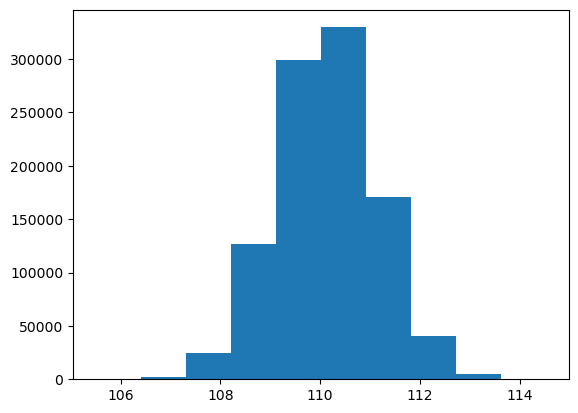

In [11]:
plt.hist(sample_100_mean_list)

In [12]:
print("Average sample mean:", np.mean(sample_100_mean_list))
print("True mean:", np.mean(data))

Average sample mean: 110.13236391862662
True mean: 110.13323090319263


Further increase sample size and sample times will make sample mean to converge to the true population mean, which shows that the sample mean is an **unbiased** statistics.

We can compare the distribution of the sample mean when using two different sample size.

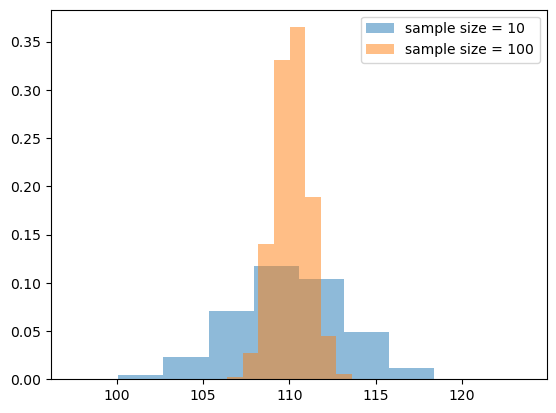

In [13]:
plt.hist(sample_10_mean_list, density=True, alpha=0.5,bins=10,label='sample size = 10')

plt.hist(sample_100_mean_list, density=True, alpha=0.5,bins=10,label='sample size = 100')

plt.legend()

Sampling distribution is wider (i.e., sampling variability is larger) when sample size is smaller!

This is because: analytically, the sampling distribution of the sample mean follows a normal distribution with mean as the population mean and the standard deviation as:$$\frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the population standard deviation, and $n$ is the sample size.

In [14]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(10))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_10_mean_list))

Analytical SD of the sampling distribution: 3.170327947585775
Empirical SD of the sampling distribution: 3.1988871884261054


In [15]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(100))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_100_mean_list))

Analytical SD of the sampling distribution: 1.0025457244057967
Empirical SD of the sampling distribution: 1.0020661178207326


### Similarly, let's examine the sampling distribution of sample variance.

In [16]:
#define a small function to calculate sample variance.
def sample_var(sample):
    mean = np.mean(sample)
    n = sample.shape[0]
    return np.sum((sample - mean)**2)/(n-1)

In [17]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([100.87903149,  92.7621389 , 110.26307708, 109.43957451,
       102.99855105, 112.24194122, 104.02973884, 100.38411806,
        97.54495227, 115.0528377 ])

In [18]:
print("Sample variance is:", sample_var(sample_10))

Sample variance is: 49.72827087781723


In [19]:
#generate samples for multiple times
sample_10_variance_list = []

for i in range(10000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    print(i," sample variance: ", sample_variance)
    
    #append them to the list
    sample_10_variance_list.append(sample_variance)

0  sample variance:  110.05521480510481
1  sample variance:  105.72177422801792
2  sample variance:  81.56284259883448
3  sample variance:  145.90396989864212
4  sample variance:  50.4619156580961
5  sample variance:  94.68238323628646
6  sample variance:  46.79325040770185
7  sample variance:  105.5404574921587
8  sample variance:  173.12646914527375
9  sample variance:  29.231310854099466
10  sample variance:  94.38684842714427
11  sample variance:  63.87610440300268
12  sample variance:  84.09933495669436
13  sample variance:  115.86337246620133
14  sample variance:  156.69521656308518
15  sample variance:  17.95311247112489
16  sample variance:  82.60758606368714
17  sample variance:  131.7309475298648
18  sample variance:  107.89827696176843
19  sample variance:  112.5569266100327
20  sample variance:  42.31065676498528
21  sample variance:  31.057038340729978
22  sample variance:  56.55759861921021
23  sample variance:  143.40833163528364
24  sample variance:  154.0445110221406
2

Sampling distribution of the variance

(array([8.620e+02, 3.385e+03, 3.142e+03, 1.679e+03, 6.440e+02, 1.980e+02,
        5.800e+01, 2.500e+01, 5.000e+00, 2.000e+00]),
 array([  4.44688414,  44.59024293,  84.73360172, 124.8769605 ,
        165.02031929, 205.16367808, 245.30703687, 285.45039566,
        325.59375445, 365.73711324, 405.88047203]),
 <BarContainer object of 10 artists>)

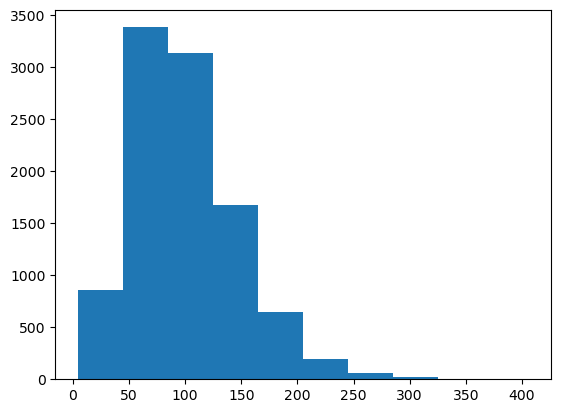

In [20]:
plt.hist(sample_10_variance_list)

In [21]:
print("Average of sample variance:", np.mean(sample_10_variance_list))

print("True variance:", np.var(data))

Average of sample variance: 100.40665840167537
True variance: 100.50979295243435


Again, fairly close!

Increase both sample size and the number of samples:

In [22]:
#generate samples for multiple times
sample_100_variance_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    #append them to the list
    sample_100_variance_list.append(sample_variance)

In [23]:
print("Average of sample variance:", np.mean(sample_100_variance_list))
print("True variance:", np.var(data))

Average of sample variance: 100.50407758120627
True variance: 100.50979295243435


Closer!

Compare the sampling distribution of sample mean for two same sizes.

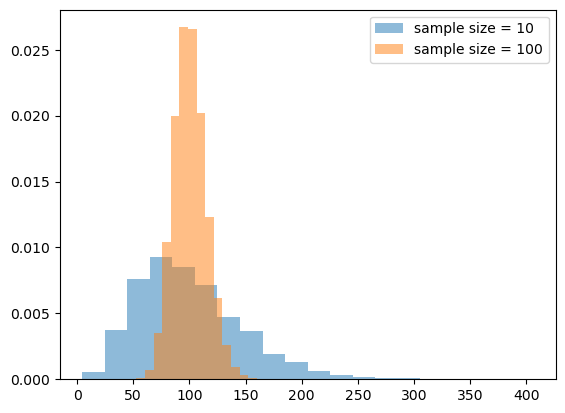

In [24]:
plt.hist(sample_10_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(sample_100_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

Analytically, the sampling distribution of sample variance follows a chi-square distribution with n - 1 (n is the sample size) degree of freedom.

$$(n-1)s^2/\sigma^2 \sim \chi^2_{n-1}$$

where $s$ is the sample standard deviation and the $\sigma$ is the population standard deviation

numpy function to simulate a chisquare distribution: `random.chisquare(df, size=None)`

In [25]:
anlytical_dist_10 = np.random.chisquare(10-1, 10000)*np.var(data)/(10-1)

anlytical_dist_100 = np.random.chisquare(100-1, 10000)*np.var(data)/(100-1)

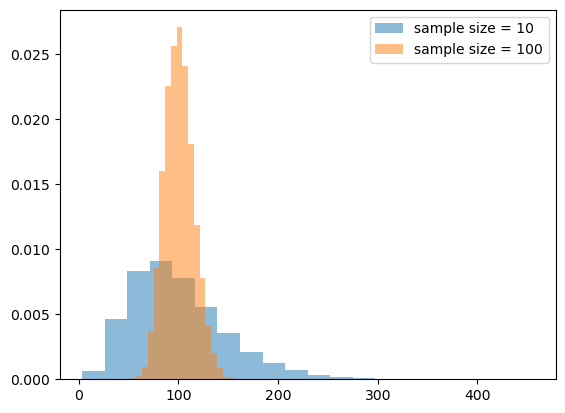

In [26]:
plt.hist(anlytical_dist_10,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(anlytical_dist_100,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

The anlaytical distributions are the same as our emprical sampling distirbutions!